In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

## Building Model

In [40]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout 
from tensorflow.keras.models import Sequential

In [41]:
model = Sequential()

## Building Convolution Layer

In [42]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [43]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [44]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [45]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [46]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [47]:
model.add(Dropout(0.25))   #To avoid Overfitting

In [48]:
model.add(Flatten())

In [49]:
model.add(Dense(units=1500,activation='relu'))

In [50]:
model.add(Dropout(0.4))

In [51]:
#Output layer
model.add(Dense(units=38,activation='softmax'))

 ### Compiling Model

In [53]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [54]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [56]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2662s 1s/step - accuracy: 0.8442 - loss: 0.4914 - val_accuracy: 0.9055 - val_loss: 0.3003
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2669s 1s/step - accuracy: 0.9118 - loss: 0.2717 - val_accuracy: 0.9258 - val_loss: 0.2272
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2093s 951ms/step - accuracy: 0.9364 - loss: 0.1947 - val_accuracy: 0.9488 - val_loss: 0.1559
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1313s 596ms/step - accuracy: 0.9549 - loss: 0.1394 - val_accuracy: 0.9598 - val_loss: 0.1318
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1307s 594ms/step - accuracy: 0.9626 - loss: 0.1114 - val_accuracy: 0.9606 - val_loss: 0.1237
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1325s 602ms/step - accuracy: 0.9705 - loss: 0.0916 - val_accuracy: 0.9551 - val_loss: 0.1596
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1298s 590ms/step - accuracy: 0.9756 - loss: 0.0750 - val_accuracy: 0.9678 - val_loss: 0.1020
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1330s 604ms/step - 

## Model Evaluation

In [57]:
#model evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 878s 395ms/step - accuracy: 0.9793 - loss: 0.0613


In [58]:
print(train_loss,train_acc)

0.05829877778887749 0.981022834777832


In [59]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 189s 331ms/step - accuracy: 0.9559 - loss: 0.1486


In [61]:
print(val_loss,val_acc)

0.1622036248445511 0.9536194205284119


## Saving model

In [62]:
model.save("trained_model.h5")

In [63]:
model.save("trained_model.keras")

In [65]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

##Accuracy Visualization

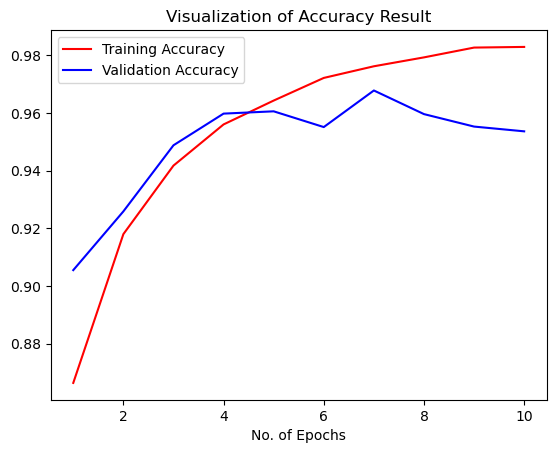

In [66]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [68]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [69]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [71]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 88s 157ms/step


(array([[9.9999988e-01, 3.0254624e-10, 2.4013146e-12, ..., 2.3484960e-15,
         4.4443144e-17, 1.4022919e-15],
        [9.9999928e-01, 6.7149188e-07, 1.1817015e-11, ..., 1.6317592e-13,
         2.1910278e-13, 1.2111042e-13],
        [1.0000000e+00, 4.8009235e-10, 1.3053018e-10, ..., 1.1652584e-15,
         1.3109011e-13, 4.0143770e-13],
        ...,
        [1.8853079e-04, 1.5873217e-08, 1.1548949e-04, ..., 3.3320923e-08,
         4.2667296e-09, 9.8595738e-01],
        [3.5917295e-05, 9.0978842e-09, 2.8426701e-04, ..., 1.6501845e-06,
         5.0640750e-08, 9.9682593e-01],
        [8.0583297e-11, 2.0582130e-11, 2.4928914e-10, ..., 1.8533258e-11,
         1.2977007e-10, 9.9995422e-01]], dtype=float32),
 (17572, 38))

In [72]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [73]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [75]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [76]:

Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [77]:
from sklearn.metrics import confusion_matrix,classification_report

In [78]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.95      0.93       504
                                 Apple___Black_rot       0.96      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.87      0.99      0.93       440
                                   Apple___healthy       0.99      0.83      0.90       502
                               Blueberry___healthy       0.97      0.94      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.91      0.99      0.95       421
                 Cherry_(including_sour)___healthy       0.96      0.98      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.84      0.90       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.99      0.

In [79]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

## Confusion matrix visualization

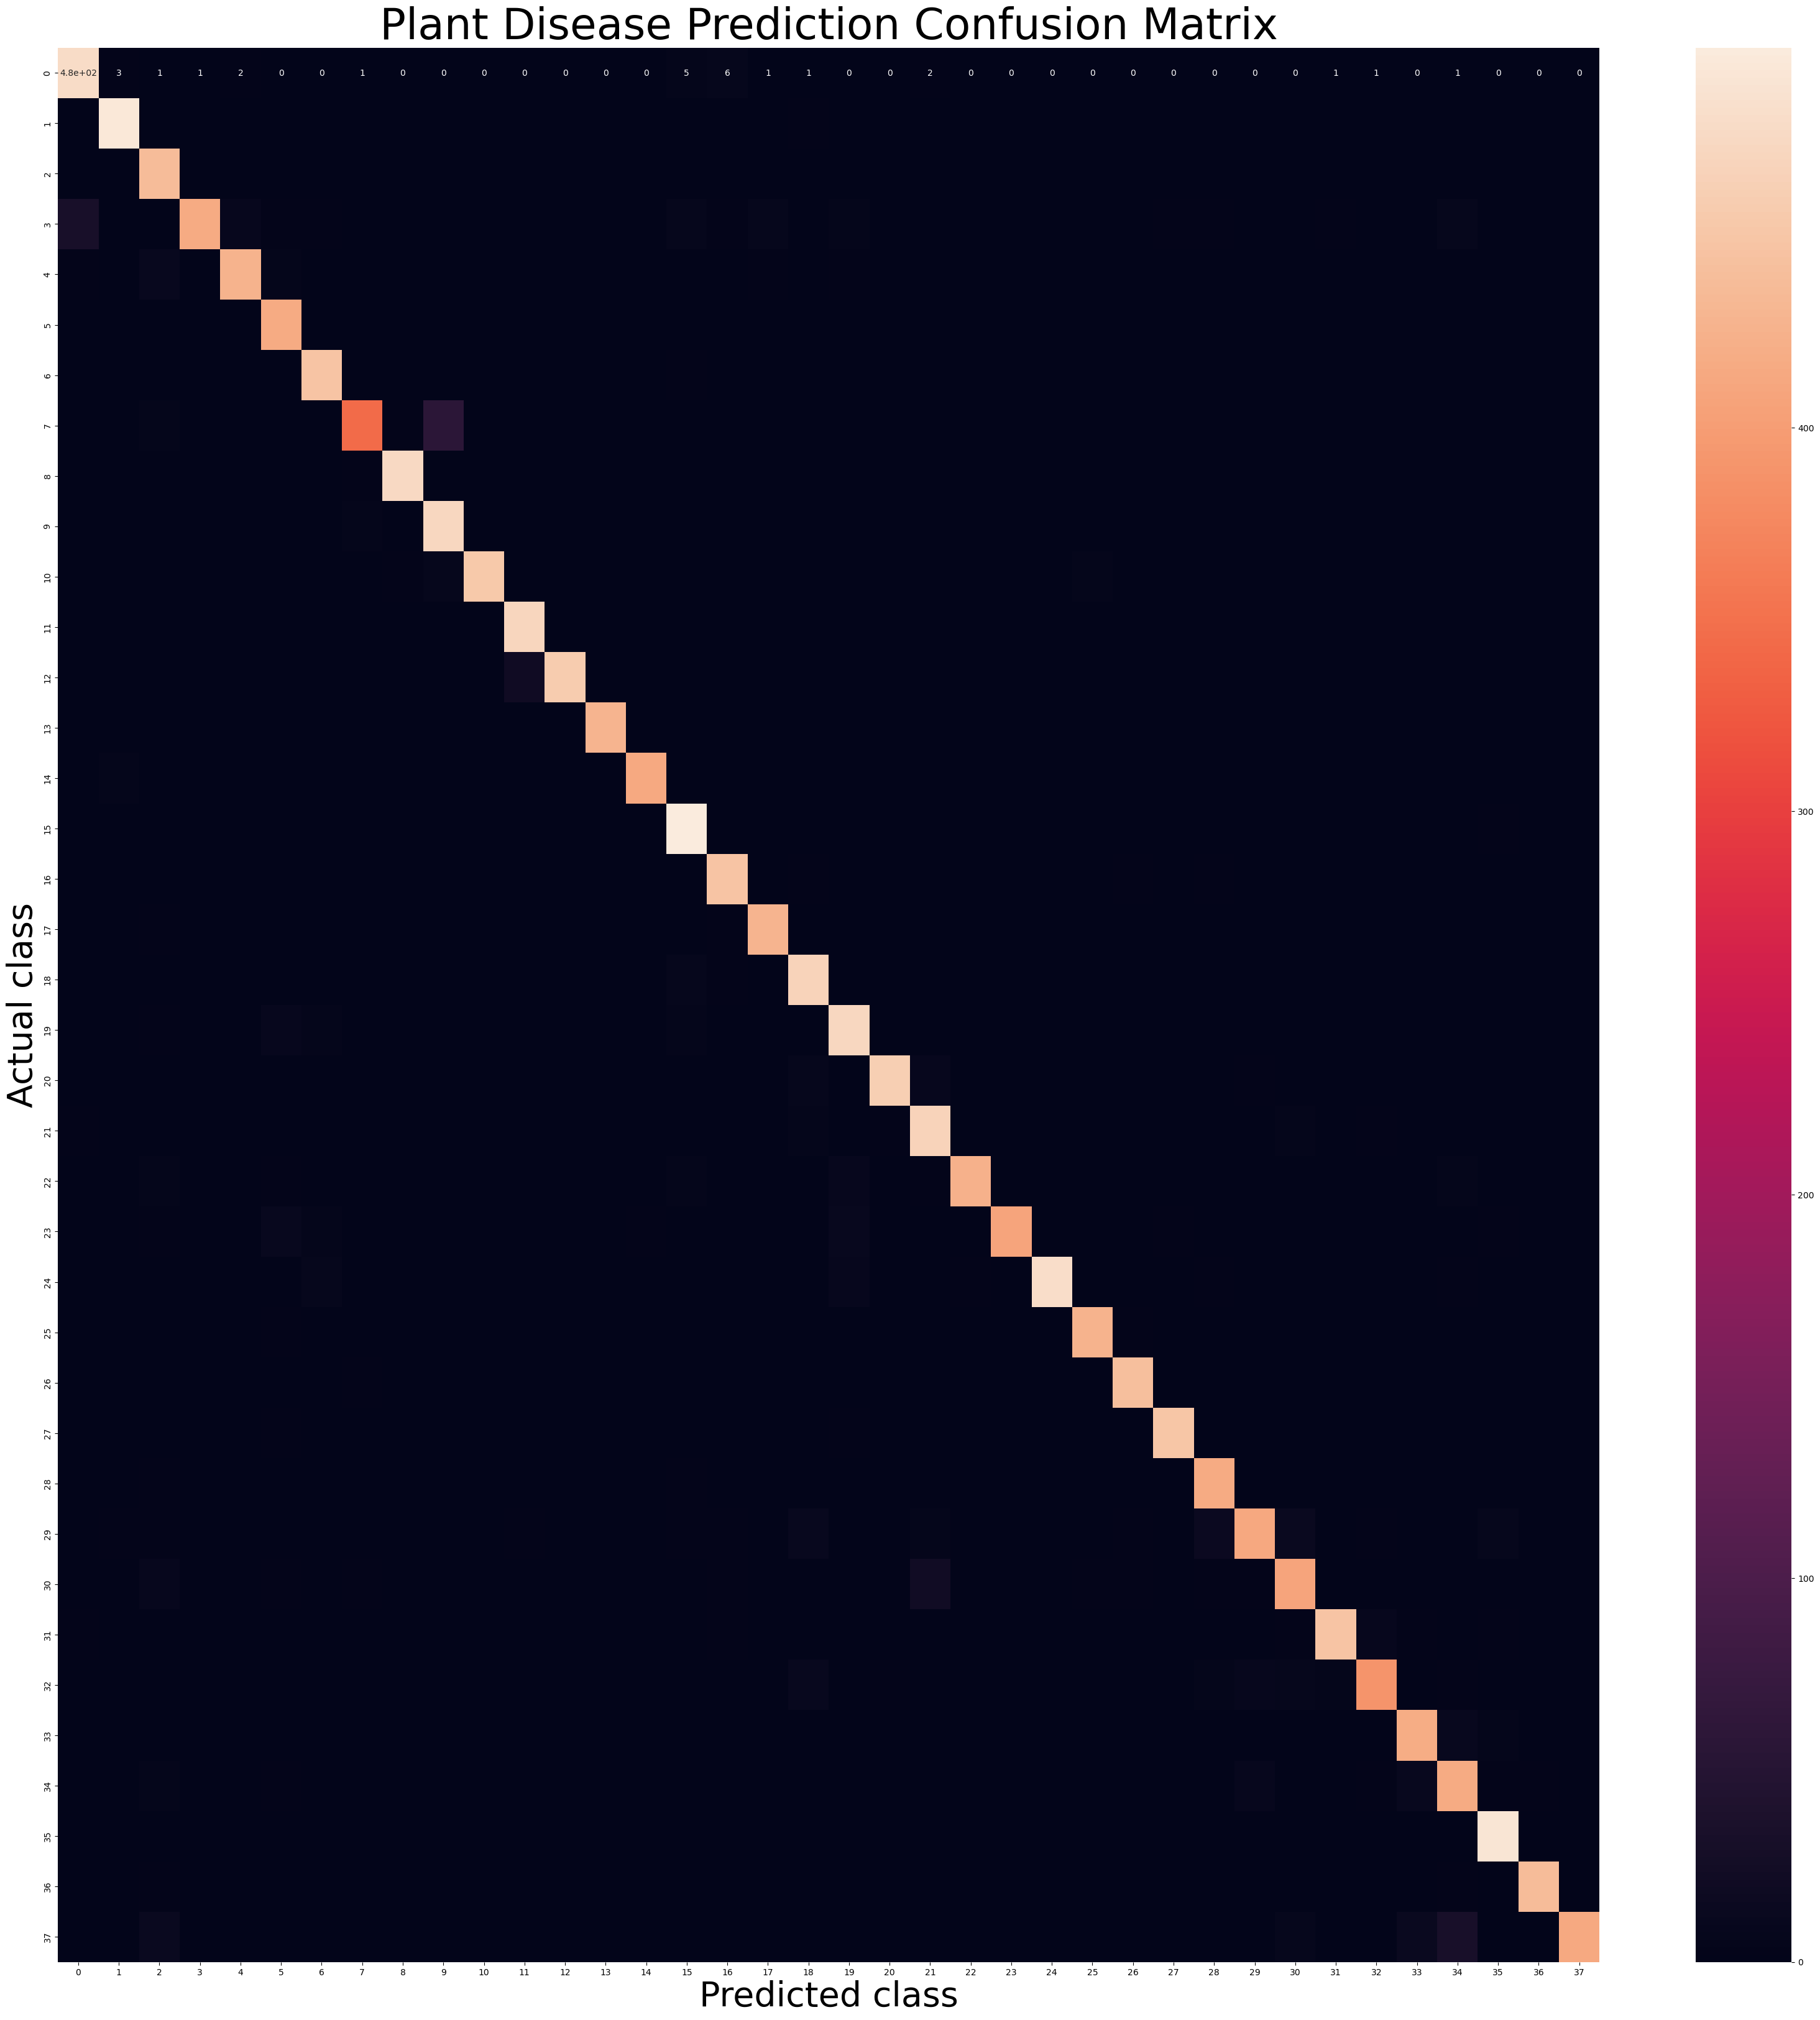

In [102]:
plt.figure(figsize=(40, 40))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True,annot_kws={'size':10})  # Adjust annot_kws to set the fontsize
plt.xlabel("Predicted class", fontsize=40)
plt.ylabel("Actual class", fontsize=40)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=50)
plt.show()

## Saving keras model as pickle (.pkl)

In [12]:
import pickle

# Open the .h5 file in binary read mode
with open('trained_model.h5', 'rb') as h5_file:
    # Read the content of the .h5 file
    h5_content = h5_file.read()

# Open a file object in binary write mode
with open('trained_model.pkl', 'wb') as pickle_file:
    # Dump the content of the .h5 file to the pickle file
    pickle.dump(h5_content, pickle_file)


In [13]:
import tensorflow as tf
import pickle

# Load the pickled file
with open('trained_model.pkl', 'rb') as pickle_file:
    # Load the object from the pickle file
    loaded_object = pickle.load(pickle_file)

# Check if the loaded object is a TensorFlow model
if isinstance(loaded_object, tf.keras.Model):
    print("Loaded object is a TensorFlow model.")

    # Print model summary
    print("Model summary:")
    loaded_object.summary()

    # Optionally, you can also perform inference on sample data if applicable
    # sample_data = ...  # Load or generate sample data
    # predictions = loaded_object.predict(sample_data)
    # print("Sample predictions:", predictions)

else:
    print("Error: Loaded object is not a TensorFlow model.")


Error: Loaded object is not a TensorFlow model.


In [16]:
import tensorflow as tf

# Load the model
loaded_model = tf.keras.models.load_model("trained_model.h5")

# Check if the loaded object is a TensorFlow model
if isinstance(loaded_model, tf.keras.Model):
    print("Loaded model is a TensorFlow model.")

    # Print model summary
    print("Model summary:")
    loaded_model.summary()

    # Test inference on sample data (replace this with your own test data)
    sample_data = ...  # Load or generate sample data
    predictions = loaded_model.predict('test/test/AppleCedarRust4.JPG')
    print("Sample predictions:", predictions)

else:
    print("Error: Loaded object is not a TensorFlow model.")


Loaded model is a TensorFlow model.
Model summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,764 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

ValueError: Unrecognized data type: x=test/test/AppleCedarRust4.JPG (of type <class 'str'>)

In [17]:
import tensorflow as tf
import pickle

# Load the TensorFlow model
model = tf.keras.models.load_model("trained_model.h5")

# Extract the model architecture and weights
model_architecture = model.to_json()
model_weights = model.get_weights()

# Create a dictionary to store the model components
model_data = {"architecture": model_architecture, "weights": model_weights}

# Save the model data as a pickled file
with open("pickled_model.pkl", "wb") as pickle_file:
    pickle.dump(model_data, pickle_file)


In [18]:
model.save("model.h5")


In [19]:
loaded_model = tf.keras.models.load_model("model.h5")


In [20]:
import pickle

# Load the pickled file
with open("pickled_model.pkl", "rb") as f:
    model = pickle.load(f)

# Check if the loaded object is a TensorFlow model
if isinstance(model, tf.keras.Model):
    print("Model type:", type(model))
    model.summary()
else:
    print("The loaded object is not a TensorFlow model.")


The loaded object is not a TensorFlow model.
